<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/InitialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# SETUP REPOSITORY
!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

Cloning into 'PythonForMachineLearning'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 178 (delta 9), reused 3 (delta 3), pack-reused 158 (from 1)
Receiving objects: 100% (178/178), 4.47 MiB | 2.82 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Biases and assumptions


-Longer flight will be more expensive

-Business flights will be more expensive than
Economical one

-Business flights will be faster than economical one, but they also will flew longer distances.

-There will be more economical flights


#Related work:


##Flight Fare Prediction | 10 ML Models
https://www.kaggle.com/code/varunsaikanuri/flight-fare-prediction-10-ml-models

This work focused on predicting price based on features. It was done in python jupiter.
Autor tested multiple regression models like:
- Linear
- Decision Tree
- Extra Regression Tree
- Random Forest
- KNN
- Ridge
- Lasso

The best results gave Extra Trees

##AirLinePrice-Regression
https://www.kaggle.com/code/nimapourmoradi/airlineprice-regression




#Preparing Data

##Loading Data

In [45]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
data1=data.copy()
data.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


##Distribution of Data

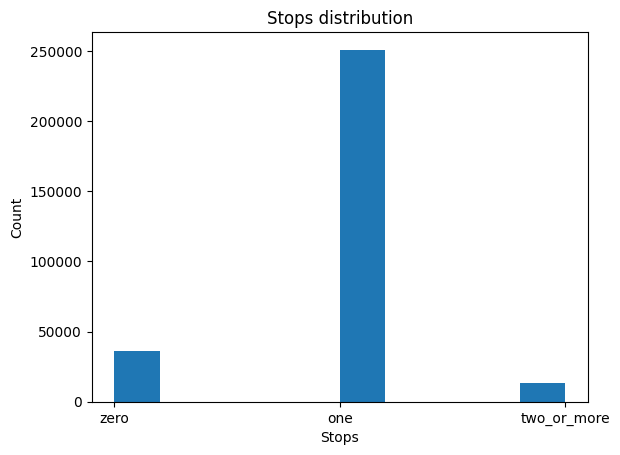

In [44]:
plt.hist(data1['stops'])
plt.title('Stops distribution')
plt.xlabel('Stops')
plt.ylabel('Count')
plt.show()

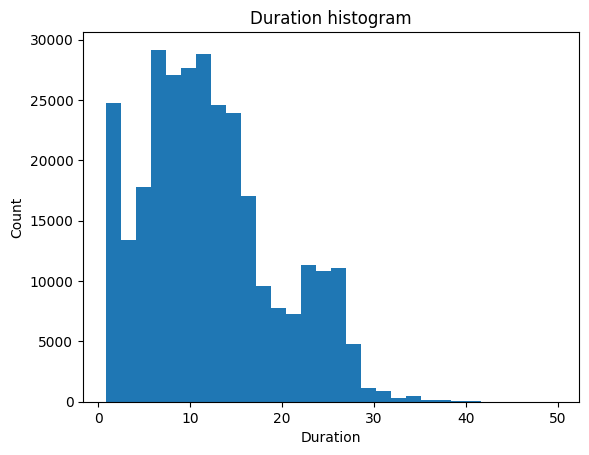

In [51]:
plt.hist(data1['duration'],bins=30)
plt.title('Duration histogram')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

uAirline=data1["airline"].unique()
print(uAirline)


['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


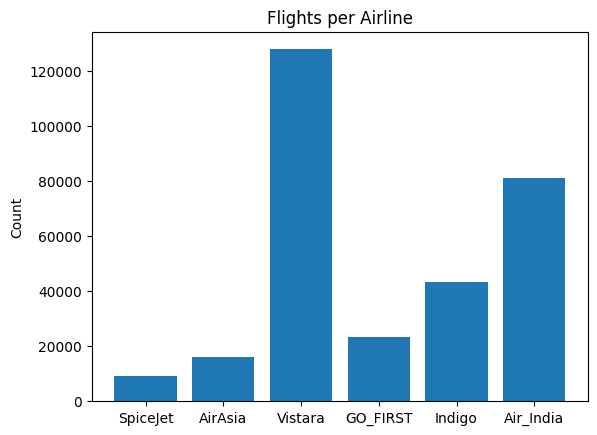

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

cAirlines=Counter(data1['airline'])

name_list = list(cAirlines.keys())
count_list = list(cAirlines.values())
plt.bar(name_list,count_list)
plt.title('Flights per Airline')
plt.ylabel('Count')
plt.show()

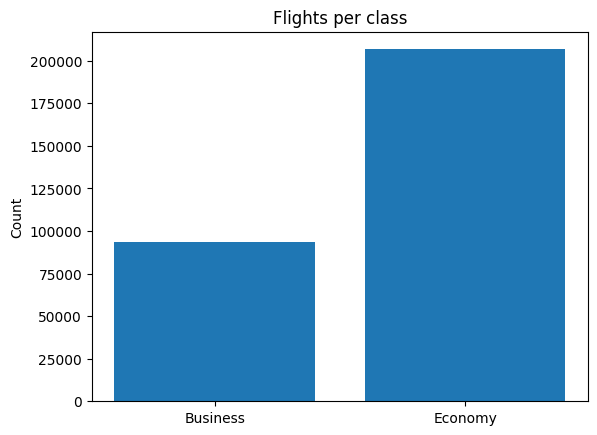

In [21]:
classes=data1["class"].sort_values()
classes_cnt=Counter(classes)
name_list = list(classes_cnt.keys())
count_list = list(classes_cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per class')
plt.ylabel('Count')
plt.show()

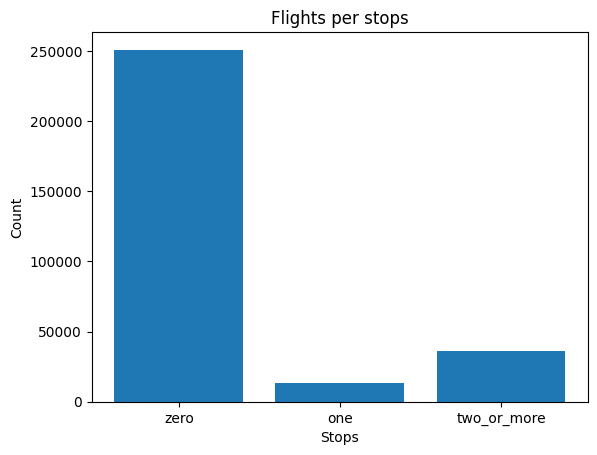

In [24]:
stops=data1["stops"].sort_values()
stops_cnt=Counter(stops)
name_list = list(stops_cnt.keys())
count_list = list(stops_cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per stops')
plt.ylabel('Count')
plt.xlabel('Stops')
plt.xticks([0,1,2],['zero','one','two_or_more'])
plt.show()

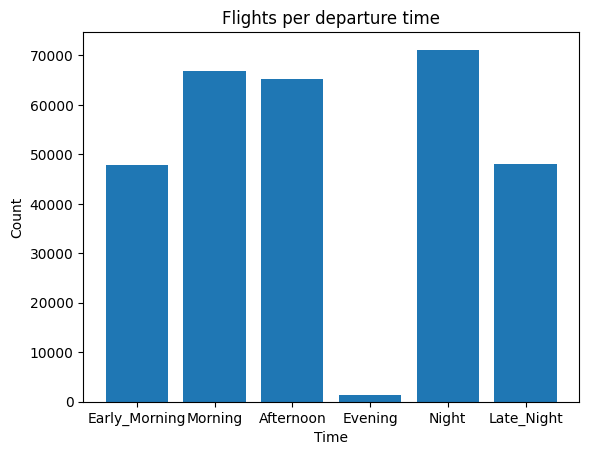

In [29]:
departure_time=data1["departure_time"].sort_values()
departure_time_cnt=Counter(departure_time)
name_list = list(departure_time_cnt.keys())
count_list = list(departure_time_cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per departure time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.show()

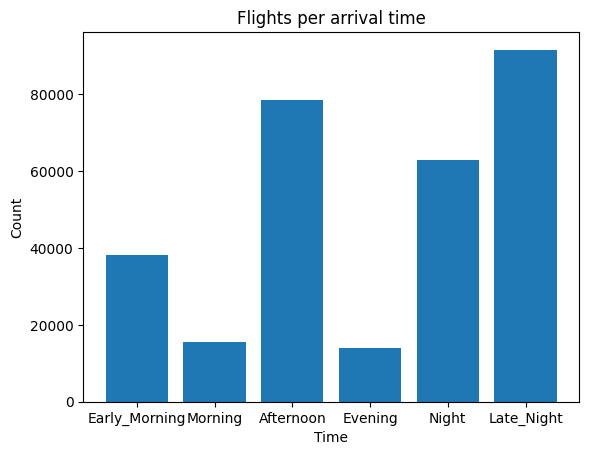

In [31]:
arrival_time=data1["arrival_time"].sort_values()
arrival_time_cnt=Counter(arrival_time)
name_list = list(arrival_time_cnt.keys())
count_list = list(arrival_time_cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per arrival time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.show()

Text(120.72222222222221, 0.5, 'Source City')

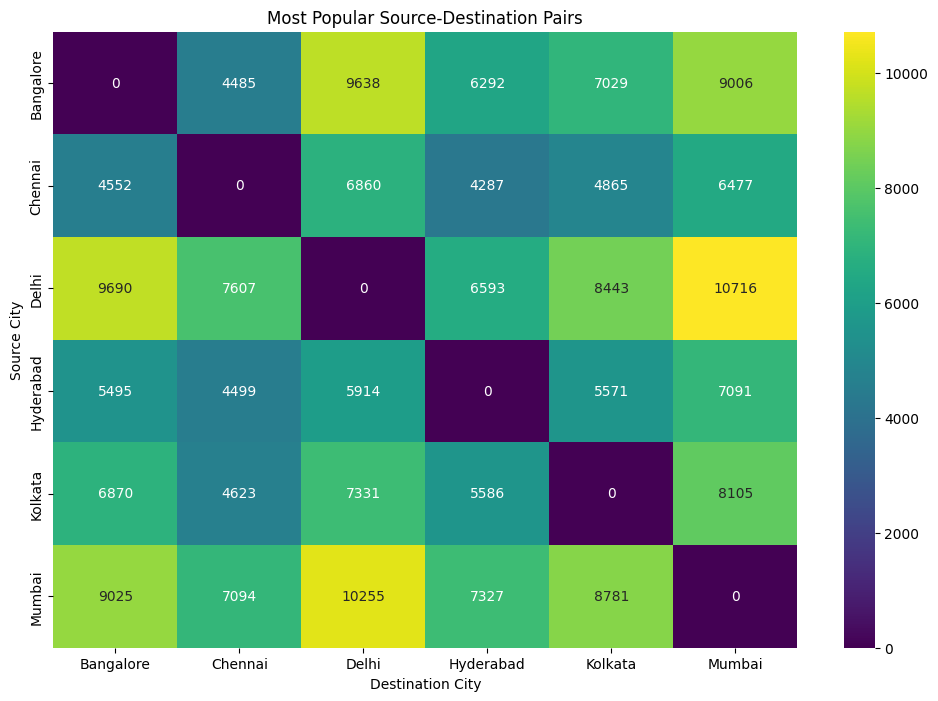

In [ ]:
city_pairs = pd.crosstab(data1['source_city'], data1['destination_city'])
plt.figure(figsize=(12, 8))
sns.heatmap(city_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Source-Destination Pairs")
plt.xlabel("Destination City")
plt.ylabel("Source City")

([<matplotlib.axis.YTick at 0x7ccfc7344e50>,
 [Text(0, 0, 'Early_Morning'),
  Text(0, 1, 'Morning'),
  Text(0, 2, 'Afternoon'),
  Text(0, 3, 'Evening'),
  Text(0, 4, 'Night'),
  Text(0, 5, 'Late_Night')])

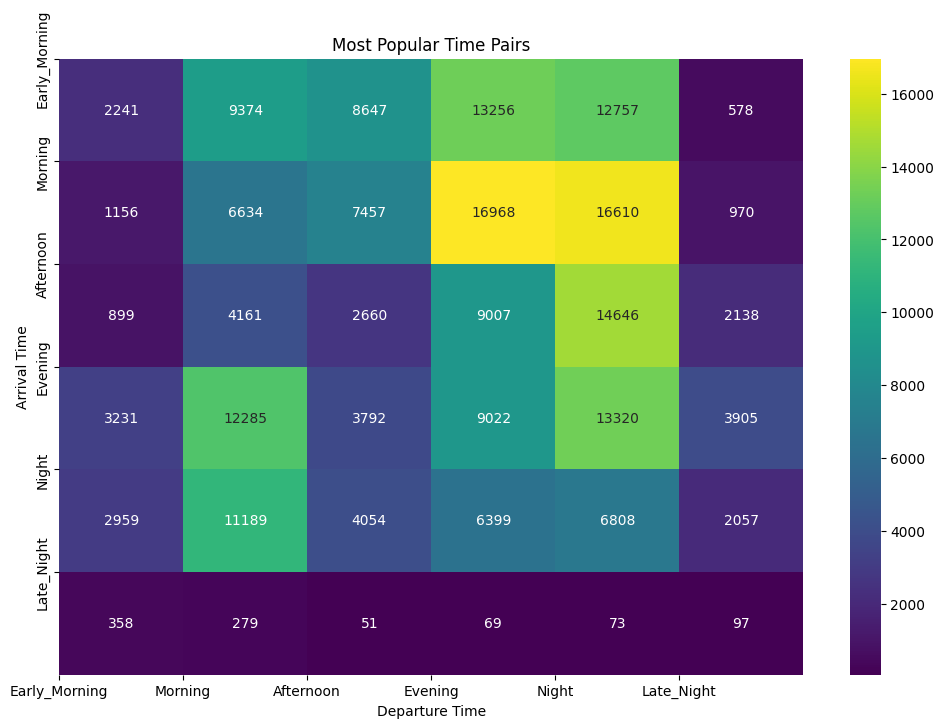

In [ ]:
time_pairs = pd.crosstab(data1['departure_time'], data1['arrival_time'])
plt.figure(figsize=(12, 8))
sns.heatmap(time_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Time Pairs")
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.yticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])

##Transforming Data

Mapping words to numbers for columns: departure time, arival time and stops.

In [46]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['zero','one','two_or_more'])
data['stops'] = le.transform(data['stops'])
le.fit(['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night'])
data['departure_time'] = le.transform(data['departure_time'])
data['arrival_time'] = le.transform(data['arrival_time'])

from sklearn.preprocessing import LabelBinarizer
bi=LabelBinarizer()
data['class']=bi.fit_transform(data['class'])

data.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,2,2,5,Mumbai,1,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,1,2,4,Mumbai,1,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,1,2,1,Mumbai,1,2.17,1,5956
3,3,Vistara,UK-995,Delhi,4,2,0,Mumbai,1,2.25,1,5955
4,4,Vistara,UK-963,Delhi,4,2,4,Mumbai,1,2.33,1,5955


Mapping numbers to cyclical variables for arrival and departure time.

In [47]:
import numpy as np

def cyclical_encoding(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

data = cyclical_encoding(data, 'departure_time', 6)
data = cyclical_encoding(data, 'arrival_time', 6)

data = data.drop(['departure_time', 'arrival_time'], axis=1)

print(data.head())

   Unnamed: 0   airline   flight source_city  stops destination_city  class  \
0           0  SpiceJet  SG-8709       Delhi      2           Mumbai      1   
1           1  SpiceJet  SG-8157       Delhi      2           Mumbai      1   
2           2   AirAsia   I5-764       Delhi      2           Mumbai      1   
3           3   Vistara   UK-995       Delhi      2           Mumbai      1   
4           4   Vistara   UK-963       Delhi      2           Mumbai      1   

   duration  days_left  price  departure_time_sin  departure_time_cos  \
0      2.17          1   5953            0.866025                -0.5   
1      2.33          1   5953            0.866025                 0.5   
2      2.17          1   5956            0.866025                 0.5   
3      2.25          1   5955           -0.866025                -0.5   
4      2.33          1   5955           -0.866025                -0.5   

   arrival_time_sin  arrival_time_cos  
0         -0.866025               0.5  
1     

Mapping classes to dummy variables for airline, source and destination city.

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

enc.fit(data[['airline','source_city','destination_city']])
dt=enc.transform(data[['airline','source_city','destination_city']])
dt=pd.DataFrame(dt, columns=enc.get_feature_names_out(['airline', 'source_city', 'destination_city']))

data=pd.concat([data,dt],axis=1)
data = data.drop(['airline', 'source_city', 'destination_city'], axis=1)

data.head()



,Unnamed: 0,flight,stops,class,duration,days_left,price,departure_time_sin,departure_time_cos,arrival_time_sin,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,SG-8709,2,1,2.17,1,5953,0.866025,-0.5,-0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,SG-8157,2,1,2.33,1,5953,0.866025,0.5,-0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,I5-764,2,1,2.17,1,5956,0.866025,0.5,0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,UK-995,2,1,2.25,1,5955,-0.866025,-0.5,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,UK-963,2,1,2.33,1,5955,-0.866025,-0.5,-0.866025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Dropping unused data and spliting dataset for trainig and test subsets.

In [43]:
import matplotlib.pyplot as plt
X=data.drop(["duration","Unnamed: 0","flight","days_left"],axis=1)
y=data["duration"]


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=1 )
X_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
107174,AirAsia,Bangalore,5,2,3,Kolkata,1,3393
183692,GO_FIRST,Chennai,1,0,0,Delhi,1,4827
208304,Vistara,Delhi,0,2,2,Mumbai,0,34472
116440,Vistara,Bangalore,5,0,4,Chennai,1,9420
65996,Air_India,Mumbai,1,0,4,Kolkata,1,6105


In [ ]:
y_train.head()

,duration
107174,2.42
183692,7.17
208304,2.17
116440,11.17
65996,24.08


#Visualization of data

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> None

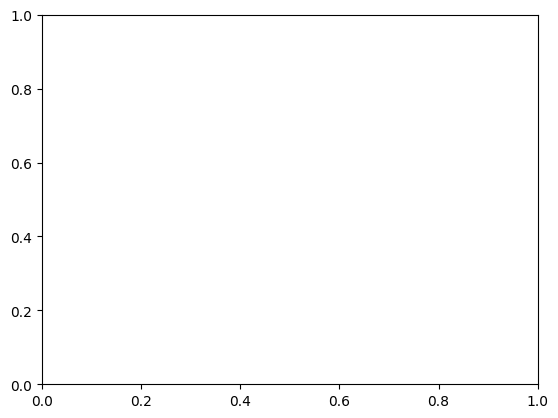

In [36]:
airline=data1.groupby("airline")
air={}
for i in uAirline:
  air[i](airline.get_group(i)['price'])


plt.boxplot(air)
plt.ylabel('Price')
plt.show()




#Project task

We chosen dataset for Flight Price Prediction

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Our project centers on the topic of flight duration prediction.

While traditional approaches in transportation forecasting have largely concentrated on price predictions, we seek to shift the focus towards predicting travel time.
This fresh perspective aims to omprove the travel experience by providing insights that are crucial for passengers planning their journeys.

To achieve this, we will analyze a dataset featuring key attributes such as airline, destination city, departure city, class, departure time, and price—all accessible to potential passengers during the booking process.

We aspire to equip travelers with the tools they need to make informed decisions and effectively minimize their time in the air.

We want to know how to predict duration of a flight, based on features like place of origin, airline,	departure time, stops,	destination city,	class, price.

Questions:

  - Does duration changes if flight starts during the day or at night.
  -
